# Logistic Regression

### importing the data processing libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

###  loading the dataset into our notebook

In [5]:
df_data = pd.read_csv('Social_Network_Ads.csv')
df_data.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


### splitting the data in terms of features and labels


In [49]:
X = df_data.iloc[:,:2].values
y = df_data.iloc[:,2:].values

### splitting the data into training set and test set

In [50]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
X_test         # which has been perfectly splitted

array([[    54, 104000],
       [    41,  52000],
       [    27, 137000],
       [    35,  79000],
       [    35,  72000],
       [    42,  70000],
       [    26,  80000],
       [    31,  34000],
       [    35,  75000],
       [    33,  69000],
       [    37,  75000],
       [    40,  57000],
       [    19,  70000],
       [    41,  87000],
       [    34,  43000],
       [    40,  61000],
       [    44,  39000],
       [    39,  73000],
       [    49,  86000],
       [    26,  32000],
       [    60, 108000],
       [    35,  97000],
       [    19,  19000],
       [    31,  74000],
       [    28,  79000],
       [    26,  86000],
       [    42,  54000],
       [    28, 123000],
       [    58,  38000],
       [    35,  60000],
       [    46,  28000],
       [    57,  60000],
       [    38,  51000],
       [    35,  22000],
       [    45,  22000],
       [    29,  61000],
       [    35,  59000],
       [    36, 126000],
       [    24,  89000],
       [    18,  52000],


### Applying feature Scaling to the dataset

In [51]:
from sklearn.preprocessing import StandardScaler
f_scale_X = StandardScaler()
f_scale_y = StandardScaler()
X_train = f_scale_X.fit_transform(X_train)


### Training our Logistic regression model on the training dataset

In [57]:
from sklearn.linear_model import LogisticRegression
regression = LogisticRegression(random_state=0).fit(X_train,np.ravel(y_train))

### Predict  new result

In [58]:
regression.predict(f_scale_X.transform([[45,20000]])) 

array([0])

### Predicting the test set results

In [63]:
predicted_results = regression.predict(f_scale_X.transform(X_test))
y1 =predicted_results

In [65]:
y2 = np.ravel(y_test)

### Making the confusion matrix

A confusion matrix is a matrix that summarizes the performance of a machine learning model on a set of test data. It is often used to measure the performance of classification models, which aim to predict a categorical label for each input instance. The matrix displays the number of true positives (TP), true negatives (TN), false positives (FP), and false negatives (FN) produced by the model on the test data.

In [77]:
from sklearn.metrics import confusion_matrix,accuracy_score
difference = confusion_matrix(y2,y1)
accuracy = accuracy_score(y2,y1)
print(difference,'\n',accuracy)   # which shows an accuracy of 0.837 which is quite good

[[52  1]
 [12 15]] 
 0.8375


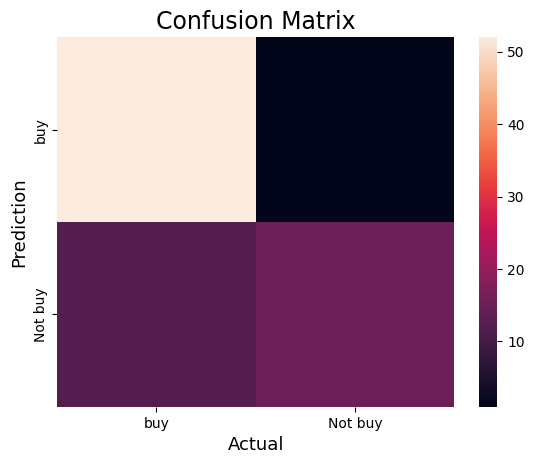

In [74]:
import seaborn as sns
sns.heatmap(difference,
             fmt='g',
           xticklabels=['buy','Not buy'],
            yticklabels=['buy','Not buy'],)
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()